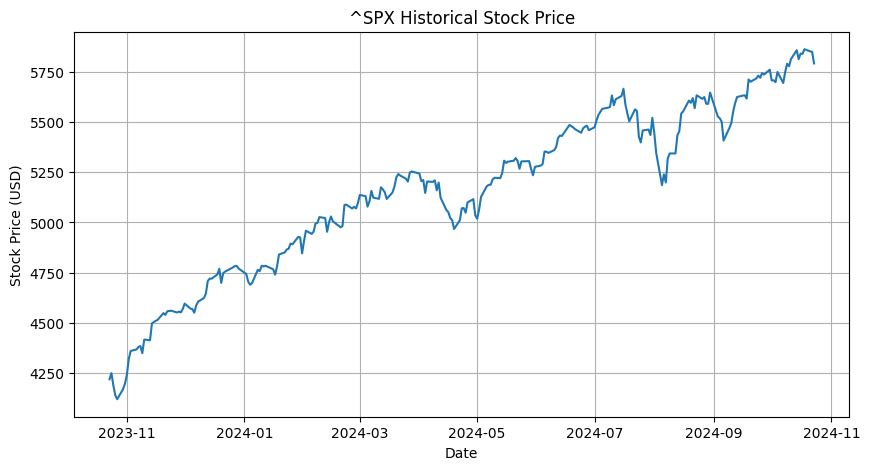

In [28]:
import yfinance as yf
import numpy as np
import scipy.stats as si
import matplotlib.pyplot as plt
import mplfinance as mpf
import plotly.graph_objects as go
from datetime import datetime
import seaborn as sns

def fetch_options_data(ticker_symbol, expiration_date):
    ticker = yf.Ticker(ticker_symbol)
    options_dates = ticker.options
    # We'll use the nearest expiry date for our analysis
    options_data = ticker.option_chain(options_dates[expiration_date])
    return options_data.calls, options_data.puts

def fetch_historical_stock_data(ticker_symbol, period="1y"):
    ticker = yf.Ticker(ticker_symbol)
    stock_data = ticker.history(period=period)
    
    if stock_data.empty:
        raise ValueError(f"No historical stock data found for ticker '{ticker_symbol}'.")
    return stock_data

ticker_symbol = "^SPX"

jpm_stock_data = fetch_historical_stock_data(ticker_symbol, period="1y")

plt.figure(figsize=(10, 5))
plt.plot(jpm_stock_data['Close'])
plt.title(f'{ticker_symbol} Historical Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.grid(True)


In [31]:
# Fetch available expiration dates
ticker = yf.Ticker(ticker_symbol)
expiration_dates = ticker.options

# Print all available expiration dates
print("Available Expiration Dates for SPX:")
for date in expiration_dates:
    print(date)


EXPIRATION_DATE_INDEX = 20
expiration_in_one_month = expiration_dates[EXPIRATION_DATE_INDEX]  # Adjust the index as necessary

# Print the selected expiration date
print(f"\nFetching options for expiration date: {expiration_in_one_month}")

Available Expiration Dates for SPX:
2024-10-23
2024-10-24
2024-10-25
2024-10-28
2024-10-29
2024-10-30
2024-10-31
2024-11-01
2024-11-04
2024-11-05
2024-11-06
2024-11-07
2024-11-08
2024-11-11
2024-11-12
2024-11-13
2024-11-14
2024-11-15
2024-11-18
2024-11-19
2024-11-20
2024-11-21
2024-11-22
2024-11-25
2024-11-26
2024-11-29
2024-12-06
2024-12-20
2024-12-31
2025-01-17
2025-01-31
2025-02-21
2025-02-28
2025-03-21
2025-03-31
2025-04-17
2025-05-16
2025-06-20
2025-06-30
2025-07-18
2025-08-15
2025-09-19
2025-09-30
2025-10-17
2025-11-21
2025-12-19
2026-01-16
2026-03-20
2026-06-18
2026-12-18
2027-12-17
2028-12-15
2029-12-21

Fetching options for expiration date: 2024-11-20


Plotting option premiums for expiration date: 2024-11-20
Note: The 'lastPrice' represents the most recent trade.



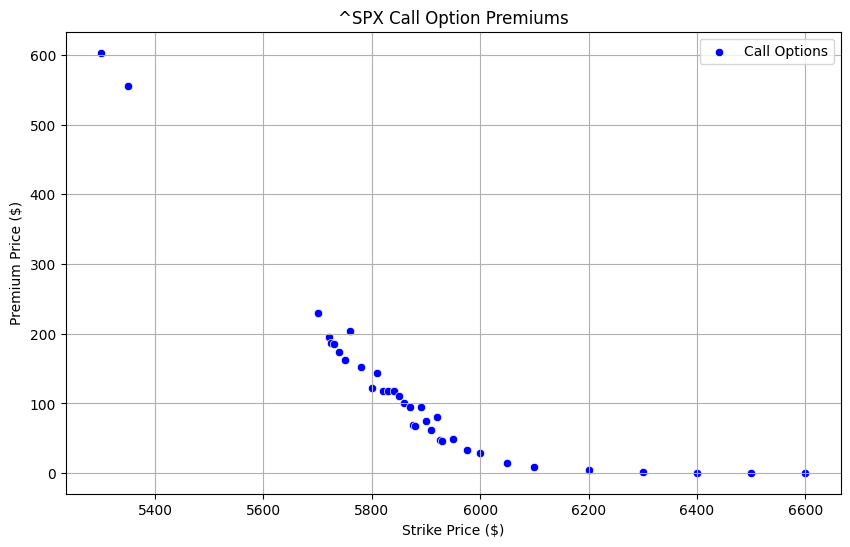

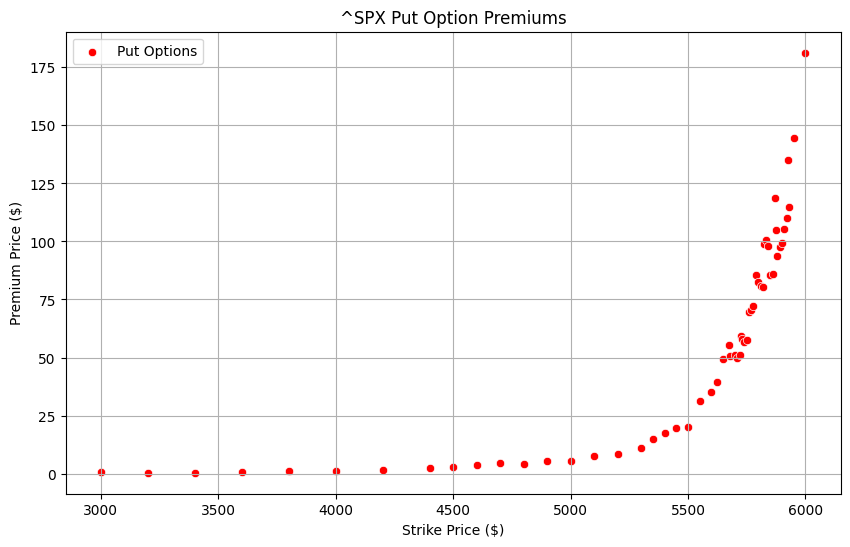

In [34]:
print(f"Plotting option premiums for expiration date: {expiration_in_one_month}")
print("Note: The 'lastPrice' represents the most recent trade.\n")

# Example usage:
calls, puts = fetch_options_data(ticker_symbol, EXPIRATION_DATE_INDEX)

# Plot Call Option Premiums
plt.figure(figsize=(10, 6))
sns.scatterplot(data=calls, x='strike', y='lastPrice', color='blue', label='Call Options')
plt.title(f'{ticker_symbol} Call Option Premiums')
plt.xlabel('Strike Price ($)')
plt.ylabel('Premium Price ($)')
plt.legend()
plt.grid(True)
plt.show()

# Plot Put Option Premiums
plt.figure(figsize=(10, 6))
sns.scatterplot(data=puts, x='strike', y='lastPrice', color='red', label='Put Options')
plt.title(f'{ticker_symbol} Put Option Premiums')
plt.xlabel('Strike Price ($)')
plt.ylabel('Premium Price ($)')
plt.legend()
plt.grid(True)
plt.show()

In [6]:

# %%
class BlackScholesModel:
    def __init__(self, S, K, T, r, sigma):
        self.S = S        # Underlying asset price
        self.K = K        # Option strike price
        self.T = T        # Time to expiration in years
        self.r = r        # Risk-free interest rate
        self.sigma = sigma  # Volatility of the underlying asset

    def d1(self):
        return (np.log(self.S / self.K) + (self.r + 0.5 * self.sigma ** 2) * self.T) / (self.sigma * np.sqrt(self.T))
    
    def d2(self):
        return self.d1() - self.sigma * np.sqrt(self.T)
    
    def call_option_price(self):
        return (self.S * si.norm.cdf(self.d1(), 0.0, 1.0) - self.K * np.exp(-self.r * self.T) * si.norm.cdf(self.d2(), 0.0, 1.0))
    
    def put_option_price(self):
        return (self.K * np.exp(-self.r * self.T) * si.norm.cdf(-self.d2(), 0.0, 1.0) - self.S * si.norm.cdf(-self.d1(), 0.0, 1.0))

# Example usage:
bsm = BlackScholesModel(S=100, K=100, T=1, r=0.05, sigma=0.2)
print(f"Call Option Price: {bsm.call_option_price()}")
print(f"Put Option Price: {bsm.put_option_price()}")

# %%
def calculate_historical_volatility(stock_data, window=252):
    log_returns = np.log(stock_data['Close'] / stock_data['Close'].shift(1))
    volatility = np.sqrt(window) * log_returns.std()
    return volatility

jpm_volatility = calculate_historical_volatility(jpm_stock_data)
print(f"JPM Historical Volatility: {jpm_volatility}")



Call Option Price: 10.450583572185565
Put Option Price: 5.573526022256971
JPM Historical Volatility: 0.19909059366562598
